In [9]:
# Code to import the data

import pandas

data = pandas.read_csv('datatest.csv', skiprows = 12)

In [10]:
data.head()

,Date,Time,Milliseconds,Relative time,El1.Average,El2.Average,El3.Average
0,28/06/2021,15:11:58,440,0.00,163.679356,161.785029,161.909780
1,28/06/2021,15:11:58,440,0.00,163.679356,161.785029,161.909780
2,28/06/2021,15:11:58,600,0.16,163.738988,161.869137,161.933258
3,28/06/2021,15:11:58,760,0.32,163.666733,161.843076,161.743127
4,28/06/2021,15:11:58,920,0.48,163.659715,161.795691,161.810335


0        163.679356
1        163.679356
2        163.738988
3        163.666733
4        163.659715
            ...    
12628    262.378838
12629    262.332776
12630    262.408618
12631    262.384125
12632    262.374501
Name: El1.Average, Length: 12633, dtype: float64


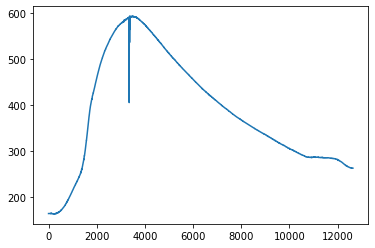

In [93]:
import matplotlib.pyplot as plt
print(data['El1.Average'])
plt.plot(data['El1.Average'])
#plt.xlim(0,4000)

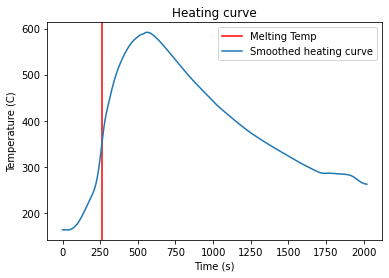

[344.40935388]


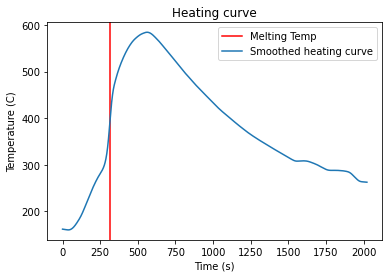

[394.77123352]


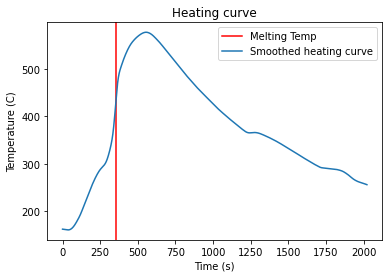

[423.31442357]


array([423.31442357])

In [95]:
# Use the module from pozzocapstone/musical-robot
# Written as function for general reproducibility. 

import numpy as np
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from scipy.signal import filtfilt
from scipy.interpolate import BSpline
import math



def melting_finder(x,y,show_graph):
    # Interpolate the data to find the a function f that can be smoothed
    f = interp1d(x, y, bounds_error=False)
    x1 = np.linspace(min(x), max(x), len(x))
    y1 = f(x1)
    # Parameters for smoothing filter
    n = 150  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    # This applies a smoothing to y (zero-phase filter)
    yy = filtfilt(b,a,y)
   
    # Combines x and filtered y
    gradient_array = np.column_stack((x1,yy))
    #plt.plot(gradient_array)

    #Calculating first gradient
    first_gradient = np.gradient(gradient_array,axis=0)
    #plt.plot(first_gradient)
    
    #Calculating first derivative
    #this just applies a scaling
    derivative = first_gradient[:,1]/first_gradient[:,0]
    #plt.plot(derivative)
    
     
    # Finding peaks in the derivative plot
    # Heavy smoothing (n = 100+) helps without really affecting the data 
    peaks, properties = find_peaks(derivative, height=0)
    # Get 1 peak height
    list_heights = list(properties['peak_heights'])
    max_height = np.max(list_heights)
    index_max = list_heights.index(max_height)
    melt_temp = yy[[peaks[index_max]]]
    
    

    # Appending the index of the highest peak to a list
    inf_index1 = list(peak_heights).index(max_height1)
  
    if show_graph == True:
        #plt.plot(x1,derivative)
        plt.axvline(x1[[peaks[index_max]]], color = 'r', label = 'Melting Temp')
        #plt.plot(x1,y1, label = "unsmoothed")
        plt.plot(x1,yy, label = "Smoothed heating curve")
        plt.title('Heating curve')
        plt.xlabel('Time (s)')
        plt.ylabel('Temperature (C)')
        plt.legend()
        plt.show()
    
    print(melt_temp)
    return melt_temp

melting_finder(data['Relative time'], data['El1.Average'], True)
melting_finder(data['Relative time'], data['El2.Average'], True)
melting_finder(data['Relative time'], data['El3.Average'], True)
    
